# Assignment 2 : Decision Trees

**UBIT Name:** Ritabanm

**UBIT Number:** 50435237

### Libraries & Data Loading

The following code imports the required libraries for the analysis.

- **Numpy and pandas:** To perform a wide variety of mathematical operations on arrays. 
- **Sklearn:** To split the dataset, evaluate model performance and visualize decision trees. 
- **Seaborn and Matplotlib:** Visualize dataset for exploratory data analysis.


In [58]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Load iris dataset
iris = load_iris()
data = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                    columns=iris['feature_names'] + ['target'])
data.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


### Data Pre-Processing & Exploratory Data Analysis.

Pre-processing and Exploratory data analysis are performed on the iris dataset to identify any potential issues and deal with them before proceeding with model development to avoid any potential problems, enhance model robustness and derive insights that may help build more robust models. 

**Pre-Processing steps**

1. Look for Missing values

2. Typically missing values are either removed (if there are not as many missing values), imputed (artificially substituted using a function that represents the distribution)

**Exploratory Data Analysis**

3. Display Summary Statistics for context on dataset, which helps provide an idea of the distribution of the dataset. 
4. Correlation matrix to visualize how the features are related to each other. 
5. Pairplot to visualize the distribution of features. 
6. Distribution of the target variables.
7. Scatterplot for the target variable classes. 

##### Looking for missing values.

- The isnull() method in python displays all the missing values in the dataset and the sum() adds up the total count of missing values. 

In [59]:
# 1. Looking for missing values
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


##### There are no missing values in the data so it is not required to make any changes.

In [60]:
# 2. Removing missing values, in case we want to update the dataset in the future and have missing values.
data.dropna(inplace=True)

#### Summary Statistics

- The describe() method in python is used to display summary stats. 

In [61]:
# 3. Summary Statistics
print("Summary Statistics:\n", data.describe())

Summary Statistics:
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


**Observations:**

- Measurements of sepal length, sepal width, petal length, petal width, and a categorical target variable are included in the dataset summary statistics for 150 samples. The average sizes are indicated by the mean values for sepal length, sepal width, petal length, and petal width, which are 5.843 cm, 3.057 cm, 3.758 cm, and 1.199 cm, respectively. The variety in these measurements is demonstrated by the standard deviations, which are 0.828 cm for sepal length, 0.436 cm for sepal width, 1.765 cm for petal length, and 0.762 cm for petal width. Minimum and maximum values are used to show the ranges of measurements: petal length ranges from 1.0 cm to 6.9 cm, petal width from 0.1 cm to 2.5 cm, sepal length ranges from 4.3 cm to 7.9 cm, and sepal width ranges from 2.0 cm to 4.4 cm.

- Each measurement type's 25%, 50%, and 75% quantile values offer a deeper understanding of the data distribution. The target variable's values range from 0 to 2, with a mean of 1.0 and a standard deviation of 0.819, suggesting that the dataset is divided into three distinct categories.




##### Looking for correlations between features.

- Correlation Matrices are used to visualize the relationship between the features in the dataset. 
- Possible values range between -1 and 1. 
- 1 implies the features are highly correlated, a change in one factor proportionately affects the other. 
- 0 implies the features are not correlated.
- -1 implies that the features are negatively correlated, a change in one factor inversely affects the other.

Correlation Matrix:
                    sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   
target                      0.782561         -0.426658           0.949035   

                   petal width (cm)    target  
sepal length (cm)          0.817941  0.782561  
sepal width (cm)          -0.366126 -0.426658  
petal length (cm)          0.962865  0.949035  
petal width (cm)           1.000000  0.956547  
target                     0.956547  1.000000  


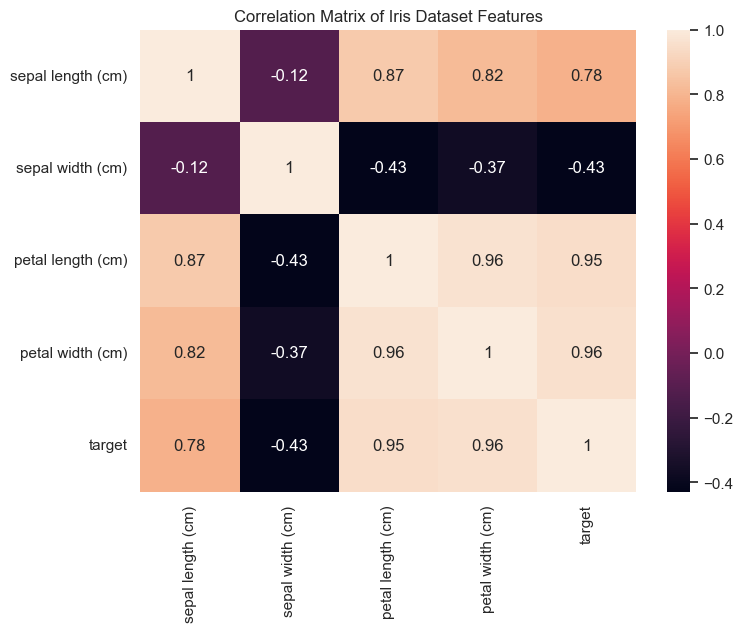

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the Iris dataset
correlation_matrix = data.corr()

# Print the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

# Visualize the correlation matrix using a heatmap in seaborn.
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix of Iris Dataset Features')
plt.show()


**Observation & Design considerations:**

- *Need for correlation Matrices:*  Correlation matrices are used to identify and quantify the strength and direction of relationships between variables, aiding in understanding how different features relate to each other within a dataset.

**Observations:**
- The correlation matrix reveals strong positive correlations between petal length, petal width, and the target variable, indicating that as one increases, the others tend to increase as well. 
- Sepal length also shows a positive correlation with these variables but to a slightly lesser extent.
- Conversely, sepal width is negatively correlated with other features, suggesting it decreases as others increase

**Design Considerations:**
- A Colormap (cmap parameter) was experimented with and avoided as it made it more challenging to interpret the matrix, despite it being more aesthetically appealing.


##### Pairplot

- The pairplot() helps us to visualize the relationships between all the variables. 

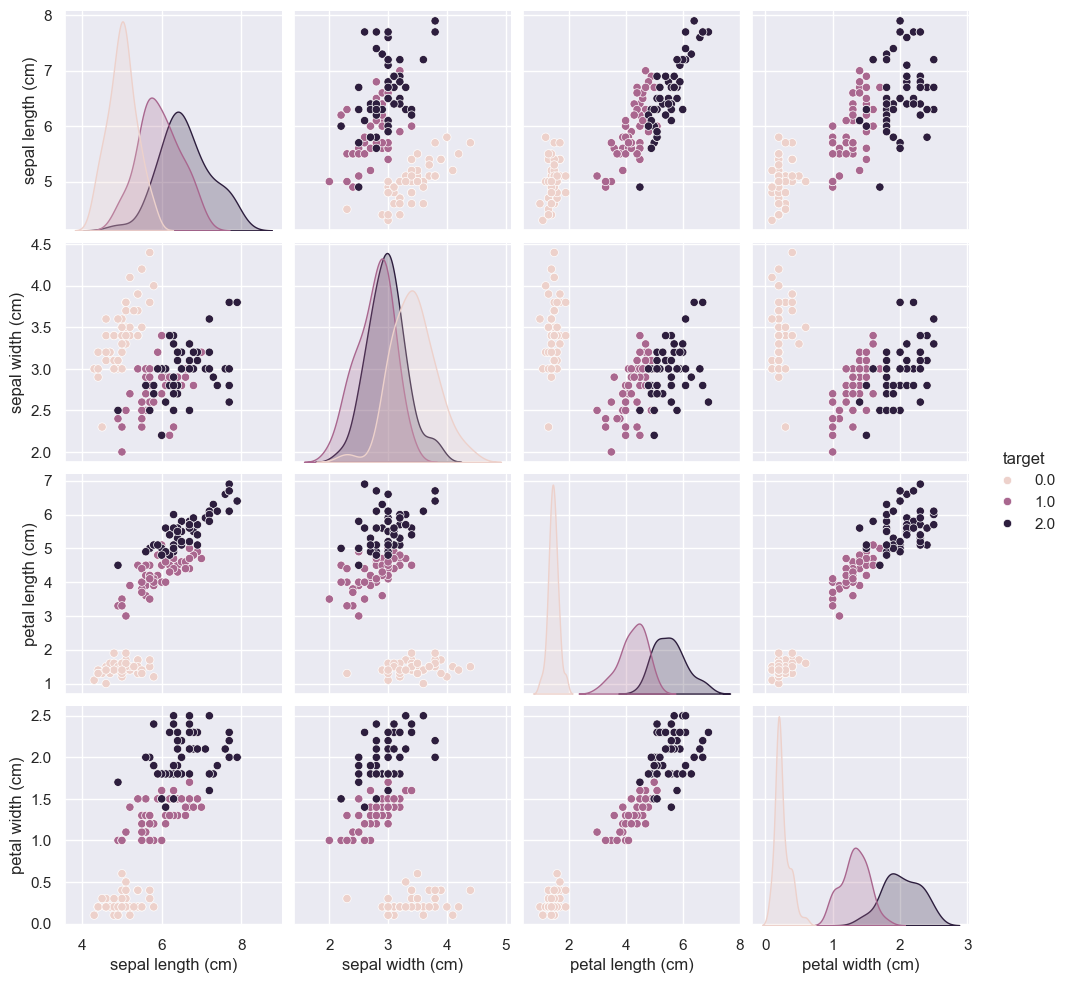

In [63]:
sns.pairplot(data, hue='target')
plt.show()

**Observation and Design considerations:**

*Need for pairplots:* They're used to display what happens to one variable when another variable is changed. 

- The scatterplots' distinct rising trend of points indicates a substantial positive association between petal length and petal width. Additionally, there appears to be a somewhat positive association between petal length and width and sepal length. 

- Sepal width, on the other hand, does not exhibit a clear pattern in connection to petal measures, indicating a less strong association. 

- According to the target variable's color-coding, two classes—Iris versicolor and Iris virginica—show some overlap but can still be distinguished in part from one another based on petal length and width, while one class—likely Iris setosa—is easily distinguished based on measurements of the sepals and petals.

*Design Considerations:*

- A hue parameter was added to make the scatterplot more visually appealing. 

##### Distributions of Target Variable.

- The following cell visualizes the distribution of target variables in the iris dataset.

/var/folders/s2/d34w5_tj7596spxj4v83khvm0000gn/T/ipykernel_54463/1063655110.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['target'], palette='magma')


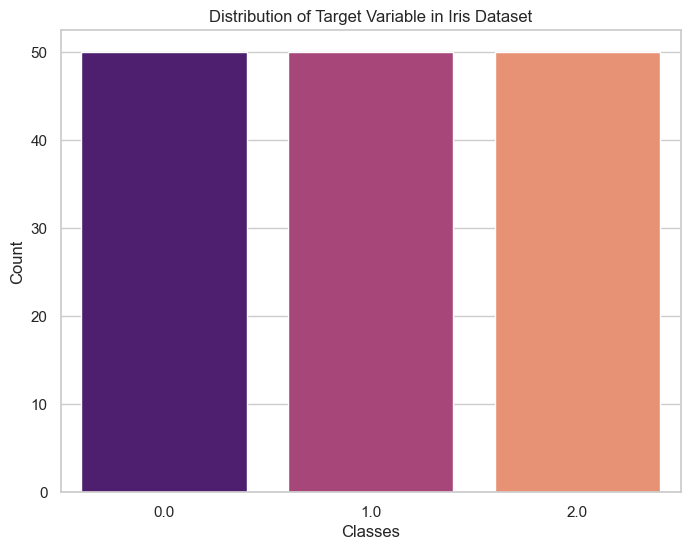

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is a DataFrame containing the Iris dataset with 'target' as one of its columns.

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot the distribution of the target variable in the Iris dataset using seaborn with purple color
plt.figure(figsize=(8, 6))
sns.countplot(x=data['target'], palette='magma')
plt.title('Distribution of Target Variable in Iris Dataset')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()


**Observations and Design considerations**

- The distribution of target variable (the class label) is equal for all three classes. 

*Design Consideration:* The magma color palette was used as it is consistent with the other plots in the analysis.

##### Visualized using a scatterplot

- The following code visualizes the class distributions for the features sepal width and sepal length.

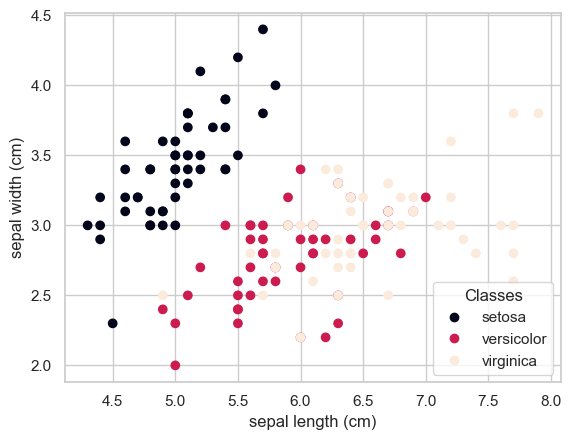

In [65]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

**Observation and Design consideration:**

- Setosa variety (black dots) is characterized by shorter and broader sepals, clustering in a region indicative of compact sepals.
- Versicolor variety (red dots) shows intermediate sepal dimensions and is situated between the other two species in the plot.
- Virginica variety (yellow dots) generally has the longest sepals with moderate widths and shows the least overlap with the other species.
- Sepal width and length measurements are effective in distinguishing setosa from versicolor and virginica.
- There is some overlap between versicolor and virginica in sepal dimensions, suggesting sepal size alone may not clearly separate these two varieties.

*Design consideration:* 

- Contrasting colors to make it more efficient to interpret the visualization.


### Decision Tree Implementation (20 points)
 


##### Based on the Pre-processing and Exploratory data analysis, it is clear that the data is ready for model development and the feature relationships from the correlation matrix have provided context for feature selection.

- Calculate entropy or Gini impurity.

In [66]:
# Calculate the Gini impurity for a split dataset
def compute_gini(groups, classes):
    total_samples = float(sum([len(group) for group in groups]))
    gini = 0.0
    for group in groups:
        size = float(len(group))
        if size == 0:
            continue
        score = 0.0
        for class_val in classes:
            p = [row[-1] for row in group].count(class_val) / size
            score += p * p
        gini += (1.0 - score) * (size / total_samples)
    return gini


- **Explanation**: 

The `compute_gini` function evaluates the Gini impurity for segments of a dataset. Gini impurity is a criterion for creating decision trees, indicating the likelihood of a random sample being misclassified if it were randomly labeled according to the distribution of classes in the segment.

The process of the `compute_gini` function is detailed as follows:

1. The total sample count across all provided groups is computed first.

2. A `gini` variable is set to 0.0 to tally the Gini impurity for each group.

3. The function loops through each group resulting from the dataset's partition.

4. The size of each group is determined. The function skips any group with no members, as it has no contribution to impurity.

5. For non-empty groups, a `score` is initialized at 0.0, where the squared proportion of each class's occurrence is accumulated.

6. Each class's presence is gauged within a group, represented by `p`, the fraction of instances of a class within the group.

7. The square of `p` is summed up in the `score`, emphasizing the impact of more prevalent classes.

8. The Gini impurity for a group is then derived by subtracting the `score` from 1.0 and adjusting it based on the group's size relative to the total sample size.

9. This adjusted impurity is added to the `gini` tally, aggregating the total impurity of the split.

10. The function concludes by returning the `gini` sum, which reflects the combined Gini impurity of the dataset's splits.

The Gini impurity is minimized in decision tree modeling, ranging from 0 (total purity) to a maximum of 0.5 for binary classification when classes are evenly split. The objective is to create branches in the tree that lead to the most homogeneous nodes.




- Find the best split point for a given feature. 


In [67]:
# Split a dataset based on an attribute and an attribute value
def test_split(index, value, data):
    left, right = list(), list()
    for row in data:
        if row[index] < value:
            left.append(row)
        else:
            right.append(row)
    return left, right

# Select the best split point for a dataset
def get_split(data):
    class_values = list(set(row[-1] for row in data))
    b_index, b_value, b_score, b_groups = 999, 999, 999, None
    for index in range(len(data[0])-1):
        for row in data:
            groups = test_split(index, row[index], data)
            gini = compute_gini(groups, class_values)
            if gini < b_score:
                b_index, b_value, b_score, b_groups = index, row[index], gini, groups
    return {'index':b_index, 'value':b_value, 'groups':b_groups}

# Create a terminal node value
def to_terminal(group):
    outcomes = [row[-1] for row in group]
    return max(set(outcomes), key=outcomes.count)

- **Explanation**:

- `test_split`:
  - Divides a dataset into two lists based on a specified index (attribute) and a value.
  - Rows where the attribute value is less than the specified value go to the 'left' group.
  - Remaining rows go to the 'right' group.
  - Returns the two lists as 'left' and 'right' groups.

- `get_split`:
  - Determines the best place to split the data.
  - Iterates through each attribute and its possible values as potential split points.
  - For each candidate split, it partitions the data using `test_split`.
  - It calculates the Gini impurity for the split using the `compute_gini` function.
  - Keeps track of the split with the lowest Gini impurity, indicating the best split.
  - Returns a dictionary with the index and value of the best split and the two resulting groups.

- `to_terminal`:
  - Creates a terminal node, which is a leaf in the tree where decisions end.
  - Determines the most common output value (class) in a group of rows.
  - Returns this most common output value as the classification for the leaf node.

These functions collectively contribute to the construction of a decision tree by recursively splitting the dataset, calculating impurity to identify the best splits, and creating terminal nodes that represent the predictions.



- Recursively build the decision tree.

In [68]:

# Create child splits for a node or make terminal
def split(node, max_depth, min_size, depth):
    left, right = node['groups']
    del(node['groups'])
    # check for a no split
    if not left or not right:
        node['left'] = node['right'] = to_terminal(left + right)
        return
    # check for max depth
    if depth >= max_depth:
        node['left'], node['right'] = to_terminal(left), to_terminal(right)
        return
    # process left child
    if len(left) <= min_size:
        node['left'] = to_terminal(left)
    else:
        node['left'] = get_split(left)
        split(node['left'], max_depth, min_size, depth+1)
    # process right child
    if len(right) <= min_size:
        node['right'] = to_terminal(right)
    else:
        node['right'] = get_split(right)
        split(node['right'], max_depth, min_size, depth+1)

# Build a decision tree
def build_tree(train, max_depth, min_size):
    root = get_split(train)
    split(root, max_depth, min_size, 1)
    return root

- **Explanation:**

- `split` function:
  - Takes a node and divides it further into child nodes or makes it a terminal node based on the provided criteria.
  - It extracts the 'left' and 'right' groups from the current node and then deletes the 'groups' key from the node.
  - Checks if either the left or right group is empty. If so, it creates a terminal node for both child nodes with the most common class value from the combined groups.
  - If the current depth equals the maximum allowed depth (`max_depth`), it converts both the left and right groups into terminal nodes.
  - For the left child, if the number of samples is less than or equal to the minimum size (`min_size`), it creates a terminal node. Otherwise, it finds the best split for the left group and recursively applies the `split` function.
  - Applies the same process to the right child as the left child.

- `build_tree` function:
  - Initializes the tree by finding the best split for the training data.
  - Calls the `split` function on the root node of the tree, setting the initial depth to 1.
  - Recursively splits the nodes until the terminal nodes are reached based on the maximum depth and minimum size criteria.
  - Returns the root node of the completed tree, which can then be used to make predictions.

These functions together create a binary decision tree where at each node a decision is made to go to the left or right child node, depending on the outcome of a binary split, until a terminal node is reached which represents the prediction.

- Make predictions using the trained tree.

In [69]:
def predict(node, row):
    # Check if we are at a leaf node (terminal node)
    if isinstance(node, dict):
        # Proceed with checking which branch to follow (left or right)
        if row[node['index']] < node['value']:
            if isinstance(node['left'], dict):
                return predict(node['left'], row)
            else:
                return node['left']
        else:
            if isinstance(node['right'], dict):
                return predict(node['right'], row)
            else:
                return node['right']
    else:
        # If node is not a dictionary, it means we are at a leaf and should directly return the node value
        return node

- **Explanation:**

The `predict` function traverses the decision tree to make a prediction for a single data row. Here's the step-by-step process:

- The function first checks if the current `node` is a dictionary (non-terminal). If not, it's a leaf node, and the function returns the node's value as the prediction.

- If the node is a dictionary (indicating that it's not a terminal node), it compares a specific feature value in the row (determined by `node['index']`) against a threshold value (`node['value']`).

- If the feature value is less than the threshold, the function moves to the left child node:
  - If the left child node is also a dictionary, the function calls itself recursively with the left child node and the row.
  - If the left child node is not a dictionary (i.e., it is a terminal node or leaf), it returns the left child's value.

- If the feature value is not less than the threshold, the function moves to the right child node:
  - If the right child node is a dictionary, the function is called recursively with the right child node and the row.
  - If the right child node is a terminal node, its value is returned as the prediction.

This recursive approach continues until a leaf node is reached, at which point the value of that leaf node is returned as the predicted class for the input row.


#### Tree Training (5 points):

In [70]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

- Split the dataset into training and testing sets

- Train your decision tree on the training set using the implemented algorithm

In [71]:
# Train the decision tree manually
def train_decision_tree(X_train, y_train, max_depth, min_size):
    training_data = np.column_stack((X_train, y_train))
    tree = build_tree(training_data.tolist(), max_depth, min_size)
    return tree

# Make predictions with the manually trained decision tree
def decision_tree_classifier(tree, X_test):
    predictions = [predict(tree, row) for row in X_test.tolist()]
    return predictions

- **Explanation:**

- The Iris dataset is loaded into variables `X` (features) and `y` (labels).

- The `train_decision_tree` function:
  - Combines the training features and labels into a single dataset.
  - Constructs a decision tree by calling the `build_tree` function, which recursively finds the best splits based on Gini impurity.
  - The tree is built considering the maximum depth (`max_depth`) and the minimum size (`min_size`) of the nodes.
  - Returns the constructed decision tree.

- The `decision_tree_classifier` function:
  - Takes the trained decision tree and the test set features as inputs.
  - Predicts the class for each instance in the test set by calling the `predict` function on each row of the test set.
  - Collects all predictions into a list and returns it.


Testing

In [72]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

# Train the manual decision tree
trained_tree = train_decision_tree(X_train, y_train, max_depth=5, min_size=10)

# Predictions with the manual tree
predictions = decision_tree_classifier(trained_tree, X_test)


**Explanation:**

- The dataset is divided into training and testing sets using the `train_test_split` function, with 20% of the data allocated for testing. The `random_state` parameter ensures reproducibility of the split.

- A decision tree is manually trained using the `train_decision_tree` function with a maximum depth of 5 and a minimum node size of 10. These parameters limit the size of the tree to prevent overfitting. The `max_depth` parameter restricts the tree to only grow to five levels deep, and `min_size` indicates the tree should not consider a split that results in a node with fewer than 10 samples.

- Once the tree is trained, the `decision_tree_classifier` function is used to predict the labels for the test set. The function applies the `predict` method to each observation in the test set to generate predictions based on the trained tree's structure.

- The `predictions` variable stores the output from the `decision_tree_classifier` function, which is a list of predicted class labels for each instance in the test set. These predictions can then be compared to the true labels (`y_test`) to evaluate the model's performance.

### Model Evaluation: (10 points) 
- Evaluate the accuracy of your decision tree model on the testing set.

In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
# Function to calculate accuracy
# Calculate metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')

# Print metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Confusion Matrix
cm = confusion_matrix(y_test, predictions)
print(f'Confusion Matrix:\n{cm}')

# Classification Report
cr = classification_report(y_test, predictions, target_names=iris.target_names)
print(f'Classification Report:\n{cr}')


Accuracy: 0.83
Precision: 0.84
Recall: 0.84
F1 Score: 0.84
Confusion Matrix:
[[9 0 0]
 [0 8 3]
 [0 2 8]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.80      0.73      0.76        11
   virginica       0.73      0.80      0.76        10

    accuracy                           0.83        30
   macro avg       0.84      0.84      0.84        30
weighted avg       0.84      0.83      0.83        30



- **Explanation:**

The key metrics used to analyze classification performance are Accuracy, Precision, Recall, F1 score, Confusion Matrix.

- **Accuracy**: Computed using `accuracy_score`, it measures the proportion of correct predictions out of all predictions made. The result is formatted to two decimal places.

- **Precision**: Calculated with `precision_score` (macro average), it determines the ratio of true positive predictions to total positive predictions across all classes, averaged without taking class imbalance into account.

- **Recall**: Calculated with `recall_score` (macro average), it assesses the ability of the model to find all relevant instances in the dataset for each class, averaged similarly to precision.

- **F1 Score**: Obtained using `f1_score` (macro average), it provides a balance between precision and recall, helpful when classes are unevenly distributed.

- **Confusion Matrix**: Generated with `confusion_matrix`, it shows the number of correct and incorrect predictions broken down by each class.

- **Classification Report**: Produced by `classification_report`, it provides a breakdown of precision, recall, and F1 score for each class, as well as the overall accuracy and a weighted average of these scores.

These metrics offer a comprehensive assessment of the model's performance, highlighting its strengths and weaknesses in classifying instances from the Iris dataset. The `target_names` from the Iris dataset are used to label the classes in the classification report.


#### Visualizing the metrics

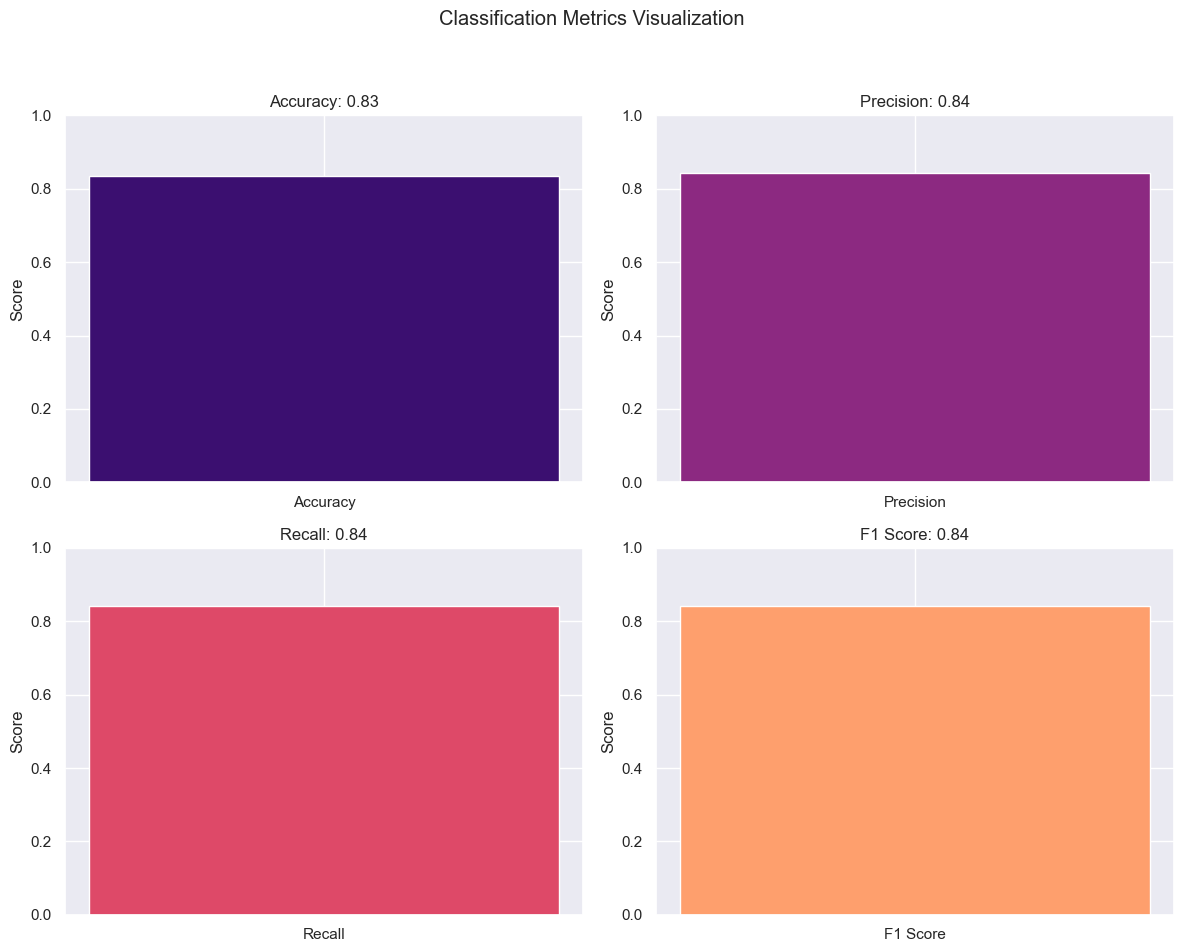

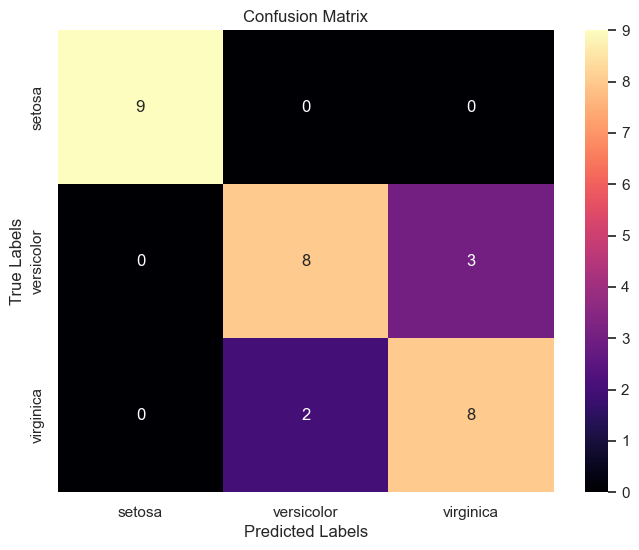

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
# Visualizing the metrics
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Classification Metrics Visualization')

# Accuracy, Precision, Recall, and F1 Score
metrics = [accuracy, precision, recall, f1]
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']


for i, (metric, name) in enumerate(zip(metrics, metric_names)):
    ax[i//2, i%2].bar(name, metric, color=sns.color_palette("magma", 4)[i])
    ax[i//2, i%2].set_ylim(0, 1)
    ax[i//2, i%2].set_ylabel('Score')
    ax[i//2, i%2].set_title(f'{name}: {metric:.2f}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='magma', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()



**Observations and Design Considerations:**

**Metrics:**

- The initial chart depicts that the model has an 83% accuracy rate, signifying it successfully forecasts the correct class in 83 out of 100 instances for all categories.

- In the second visualization, a precision metric of 0.84 is featured. Precision measures the proportion of correct positive predictions against all positive predictions made. This implies that the model's predictions are accurate 84% of the time when it asserts a positive classification.

- The third visual presents a recall, or sensitivity, measure of 0.84. This metric assesses the fraction of actual positives the model correctly identifies. Therefore, the model is capable of recognizing 84% of the true positive instances.

- Finally, the last chart illustrates an F1 Score of 0.84, a metric that combines precision and recall. An F1 Score at this level indicates a good balance between the two, suggesting the model is equally adept at managing both types of classification errors.

**Confusion Matrix:**

- The model perfectly classified all instances of the 'setosa' class, with 9 true positives and no misclassifications.

- For the 'versicolor' class, the model correctly predicted 8 instances but incorrectly classified 3 instances as 'virginica'.

- In the case of 'virginica', the model accurately identified 8 instances, but 2 were misclassified as 'versicolor'.

### Visualizing the tree

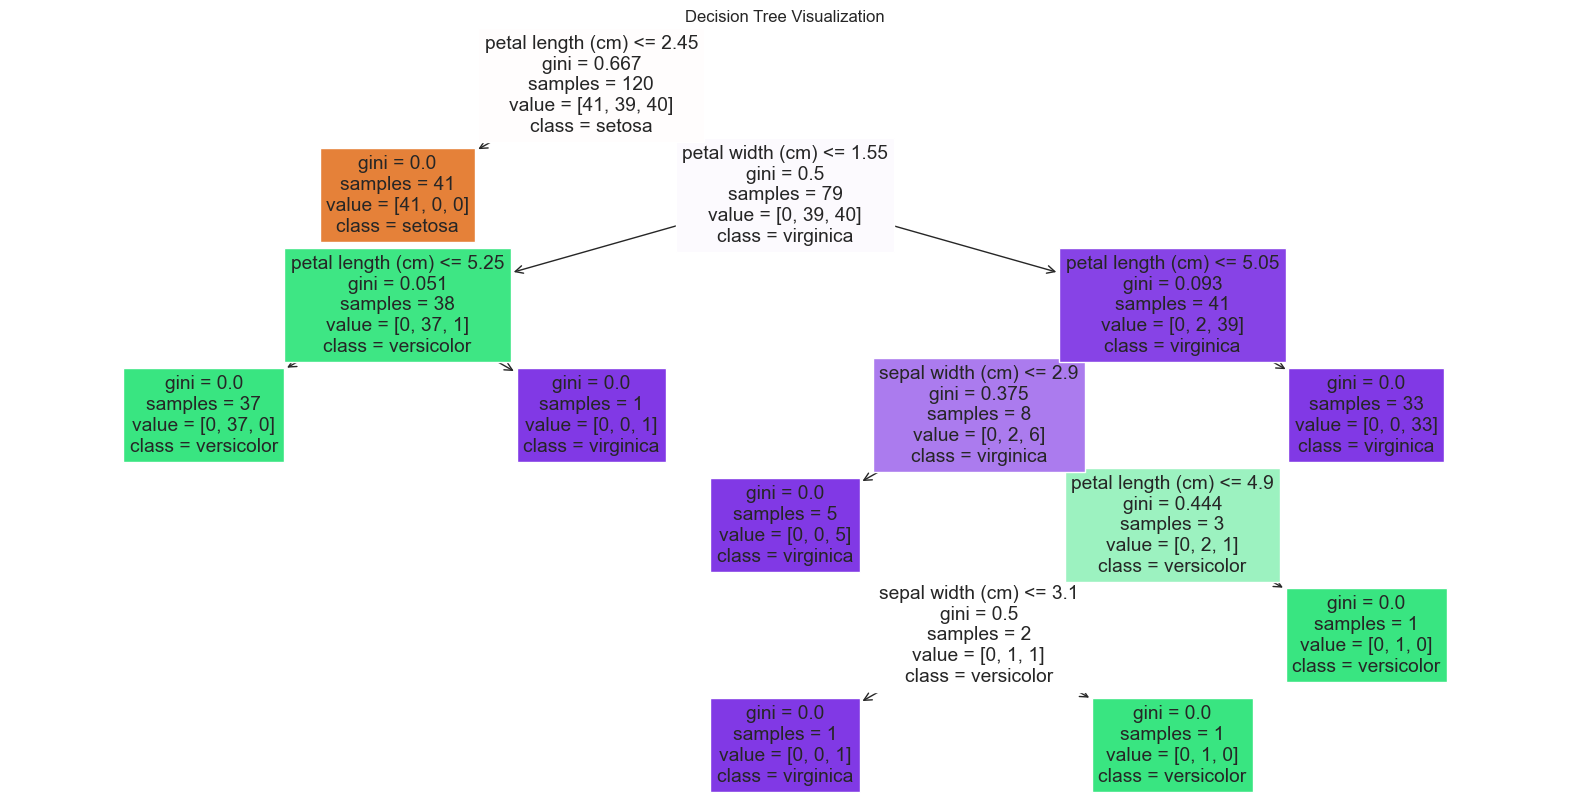

In [75]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
plt.figure(figsize=(20,10))
plot_tree(decision_tree, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title('Decision Tree Visualization')
plt.show()

**Interpretation:**

- The initial split in the decision tree is based on petal length at a cut-off of 2.45 cm. This division successfully categorizes all instances of the 'setosa' variety into the left branch, confirmed by a Gini index of 0.0 for 41 instances, indicating no misclassification at this node.

- Progressing deeper into the tree on the right, the decision node using petal width at 1.55 cm effectively groups the majority of the 'virginica' species separately from the 'versicolor'. However, there are instances where 'virginica' is inaccurately classified as 'versicolor'.

- The decision tree further segments the data on additional attributes like petal length and sepal width. These splits are aimed at minimizing the Gini impurity, which is a metric that quantifies the mix of classes within a node.

- Nodes at the end of the tree, known as leaf nodes, with a Gini index of 0.0 represent nodes that are homogenous, meaning that all instances within these nodes belong to a single class, illustrating perfect classification for several 'virginica' and 'versicolor' samples.

- The figures within each node denote the count of instances for each class at that stage of the decision process, typically arranged in the order of ['setosa', 'versicolor', 'virginica'].

### Documentation and Analysis: (5 points) 
- Provide clear and concise documentation for your code, explaining each function and its purpose. 
- Discuss any design choices you made during the implementation. 
- Reflect on the performance of your decision tree model. What are its strengths and limitations?

**Design Considerations**

The scatter plot's design reflects thoughtful choices aimed at enhancing user interpretation across diverse requirements. Key design aspects include:

- **Color Selection**: Utilizing black, red, and yellow achieves strong contrast to differentiate the Iris species, but alternative palettes might better serve those with color vision impairments.

- **Marker Distinction**: While each species is uniquely colored, incorporating different shapes could further aid differentiation, a benefit in monochrome displays or for those with colorblindness.

- **Legend Clarity**: The legend's strategic positioning and clear labeling promote quick association of colors to species, though it could obscure data if the plot's data range were to expand.

- **Descriptive Axes**: Clearly marked axes with feature names and measurement units (centimeters) provide essential information for scale comprehension.

- **Gridline Utilization**: Gridlines help in value approximation but could be softened to minimize distraction.

- **Overlap Management**: Overlapping data points, particularly between versicolor and virginica species, might be better managed with adjustments to point transparency for improved density visualization.

- **Sizing Appropriateness**: The current plot size is well-suited to the dataset, but scalability should be considered for larger datasets to maintain point discernibility.

- **Image Resolution**: The resolution is adequate for digital viewing but should be high for print quality.

- **Point Outlining**: Currently, data points lack outlines for a cleaner look, yet adding slight outlines might enhance visibility against overlapping areas.

These elements are integral to the plot's usability and effectiveness in conveying information to a wide audience and in various usage scenarios.

### Performance of the decision tree model, strength and limitations:

**Performance:**
The provided image appears to be a text output summarizing the performance of a classification model on the Iris dataset. Here's what the information implies:

- **Accuracy**: The model correctly predicts 83% of the overall cases. It is a general measure of the model's performance across all classes.
  
- **Precision**: On average (macro average), the model has a precision score of 0.84. This means that when the model predicts a class, it is correct about 84% of the time. The precision for individual classes varies, with 'setosa' at 1.00 (no false positives), 'versicolor' at 0.80, and 'virginica' at 0.73.
  
- **Recall**: The average recall score is also 0.84, indicating that the model is able to identify 84% of all true cases across classes. For individual classes, 'setosa' is at 1.00 (it identifies all 'setosa' cases), 'versicolor' is at 0.73, and 'virginica' is at 0.80.
  
- **F1 Score**: The F1 score, which balances precision and recall, is 0.84 on average, showing a good balance between the model's precision and recall. For individual classes, 'setosa' again scores perfectly at 1.00, while 'versicolor' and 'virginica' have equal F1 scores of 0.76.
  
- **Confusion Matrix**: This matrix shows the number of correct and incorrect predictions broken down by class. The model perfectly classified all 'setosa' instances (9 true positives). For 'versicolor', it correctly predicted 8 instances but confused 3 with 'virginica'. Similarly, it misclassified 2 'virginica' instances as 'versicolor' but correctly predicted 8.

- **Classification Report**:
  - For 'setosa', the model achieved perfect scores across precision, recall, and F1, with 9 instances being correctly classified.
  - 'Versicolor' had a precision of 0.80 and a recall of 0.73, resulting in an F1 score of 0.76, indicating that there were some instances of 'versicolor' either being missed or misclassified.
  - 'Virginica' had a precision of 0.73 and a recall of 0.80, with an F1 score of 0.76, suggesting that it was occasionally misclassified as 'versicolor'.

**Model Strengths:**
- The model exhibits high accuracy (0.83) for the classification task, indicating that it correctly predicts the outcome for a significant majority of instances.
- The model has perfect precision (1.00) and recall (1.00) for the 'setosa' class, meaning it correctly identified all instances of this class without any false positives or false negatives.
- The F1 scores for each class are relatively high (all above 0.75), showing a good balance between precision and recall across the classes.
- The overall macro-average and weighted-average scores for precision, recall, and F1 are consistent and high (0.84, 0.83, 0.84 respectively), indicating the model is performing well across all classes.

**Model Limitations:**
- The model has some difficulty differentiating between 'versicolor' and 'virginica' classes, as indicated by the lower precision and recall for these classes compared to 'setosa'.
- There are misclassifications evident in the confusion matrix, with 'versicolor' being mistaken for 'virginica' and vice versa. This is highlighted by the 3 instances of 'versicolor' being classified as 'virginica' and 2 instances of 'virginica' being classified as 'versicolor'.
- The classification report shows that 'virginica' has a lower precision (0.73), indicating more false positives, and 'versicolor' has a lower recall (0.73), indicating more false negatives for these classes.

***Summary:*** Overall, the model demonstrates strong predictive capabilities, especially for the 'setosa' class. However, the confusion between 'versicolor' and 'virginica' suggests that the model may benefit from further tuning or the use of more discriminative features to better differentiate these classes. The limitations are likely due to the overlap in feature distributions for 'versicolor' and 'virginica', which could be addressed by exploring more complex models or feature engineering techniques.